# Scientific Python Bootcamp Day 3

Prepared and presented by John Russell and Ian Hunt-Isaak

This notebook is available on [Github](https://github.com/Hekstra-Lab/scientific-python-bootcamp/blob/master/day3/day3.ipynb)

### Outline for the Day
- Making beautiful plots for presentations
- Crash course in covariance
- Application: financial time series data
- Time for questions, help, and other applications

### Making Beautiful Plots

It is one thing to make a plot for yourself, e.g. to make sure a function does what you want to do some preliminary data visualization. But when the time comes to turn your plot in as part of an assignment or to present in slides, you need to make the plots clear and readable for your audience.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import scipy
#import matplotlib as mpl




In [2]:
#generate some data to plot - use lorenz equations from yesterday
ver = scipy.__version__
if float(ver[:ver.rindex('.')]) < 1.4:
    raise ImportError('This cell will only work with scipy version >=1.4')
    
    
def lorenz(t, r, rho, sigma, beta):
    x,y,z = r
    dxdt = sigma*(y-x)
    dydt = x*(rho-z) - y
    dzdt = x*y-beta*z
    return np.array([dxdt, dydt, dzdt])

init_vals = np.array([1,1,1])


lorenz_sol = solve_ivp(lorenz, (0,100), init_vals, t_eval = np.linspace(0,100,50000), args=(28, 10, 8/3))

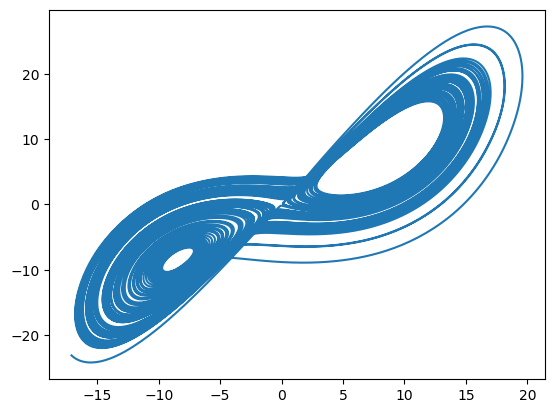

In [3]:
plt.style.use('default')
plt.plot(lorenz_sol.y[0], lorenz_sol.y[1])
plt.savefig("bad_plot1.png")
plt.show()

[Look at this plot in google slides](https://docs.google.com/presentation/d/1m_e95QT_hWmRM7InbBNS_zTQLK61z9B0MyIgTXlMY-k/edit#slide=id.g7ddea531b5_0_45)

### Whats wrong here?
- Background - bad for notebook but maybe good for white slides
- Line - too thick - cannot see all the features
- Size - relatively small
- Labels - title is uninformative, no labels (or legend though not relevant here)
- Font - too small for people to read

In [4]:
#These are some matplot lib configurations that I like to use. 
import matplotlib as mpl
mpl.rc("font", family = "serif") #Serif font in matplotlib
mpl.rc("figure",figsize=(9,6)) #Increase default figure size
%config InlineBackend.figure_format = 'retina' #Render the plots more nicely

# FOR JUPYTER DARK THEME
#the below make plots look better if youre using the dark theme for jupyter
# mpl.style.use('dark_background') #Use a dark background for matplotlib figures 
# plt.rcParams.update({"figure.facecolor": "111111", #show figures here with a matching background
#                      "savefig.facecolor": "212121"}) #save figures with the color of google slides "Simple Dark" Theme

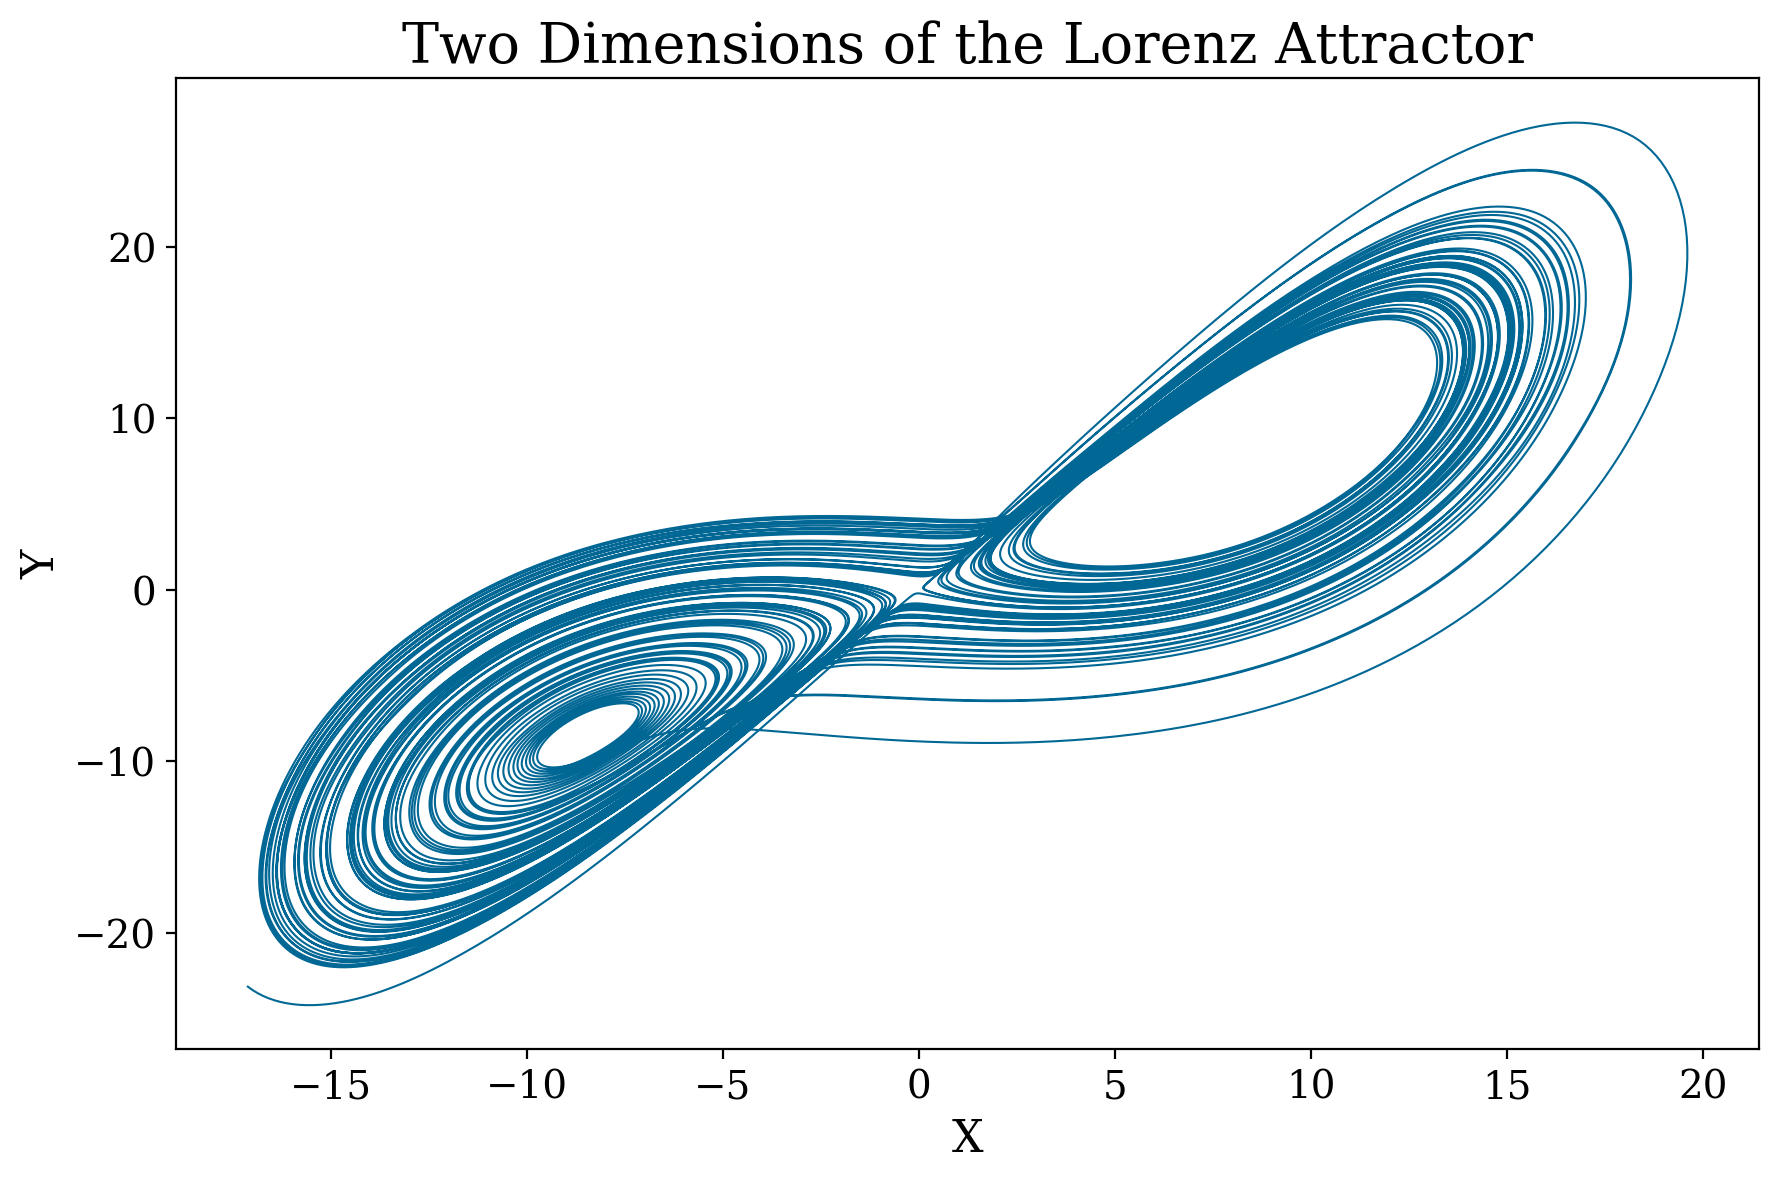

In [5]:
#improved version
plt.figure(figsize=(9,6))#arguments are width and height in inches
plt.plot(lorenz_sol.y[0], lorenz_sol.y[1], linewidth = .75, color='xkcd:peacock blue') #make line narrow to show all features. For simple plots they should be thicker.
plt.title('Two Dimensions of the Lorenz Attractor',fontsize=20)
plt.xlabel('X',fontsize=16)
plt.ylabel('Y', fontsize=16)

# set size of numbers on axes
# solution based on: https://stackoverflow.com/a/49930580/835607
ax = plt.gca()
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)

# crop annoying white space when you save the figure
plt.tight_layout()

#save the figure
plt.savefig('good_plot1.png',dpi=200)
plt.show()

# Principle Component Analysis

In [6]:
mean = [0,0]
off_diag = .9
cov = [[1,off_diag],[off_diag,1]]
pts = np.random.multivariate_normal(mean, cov, size=300)

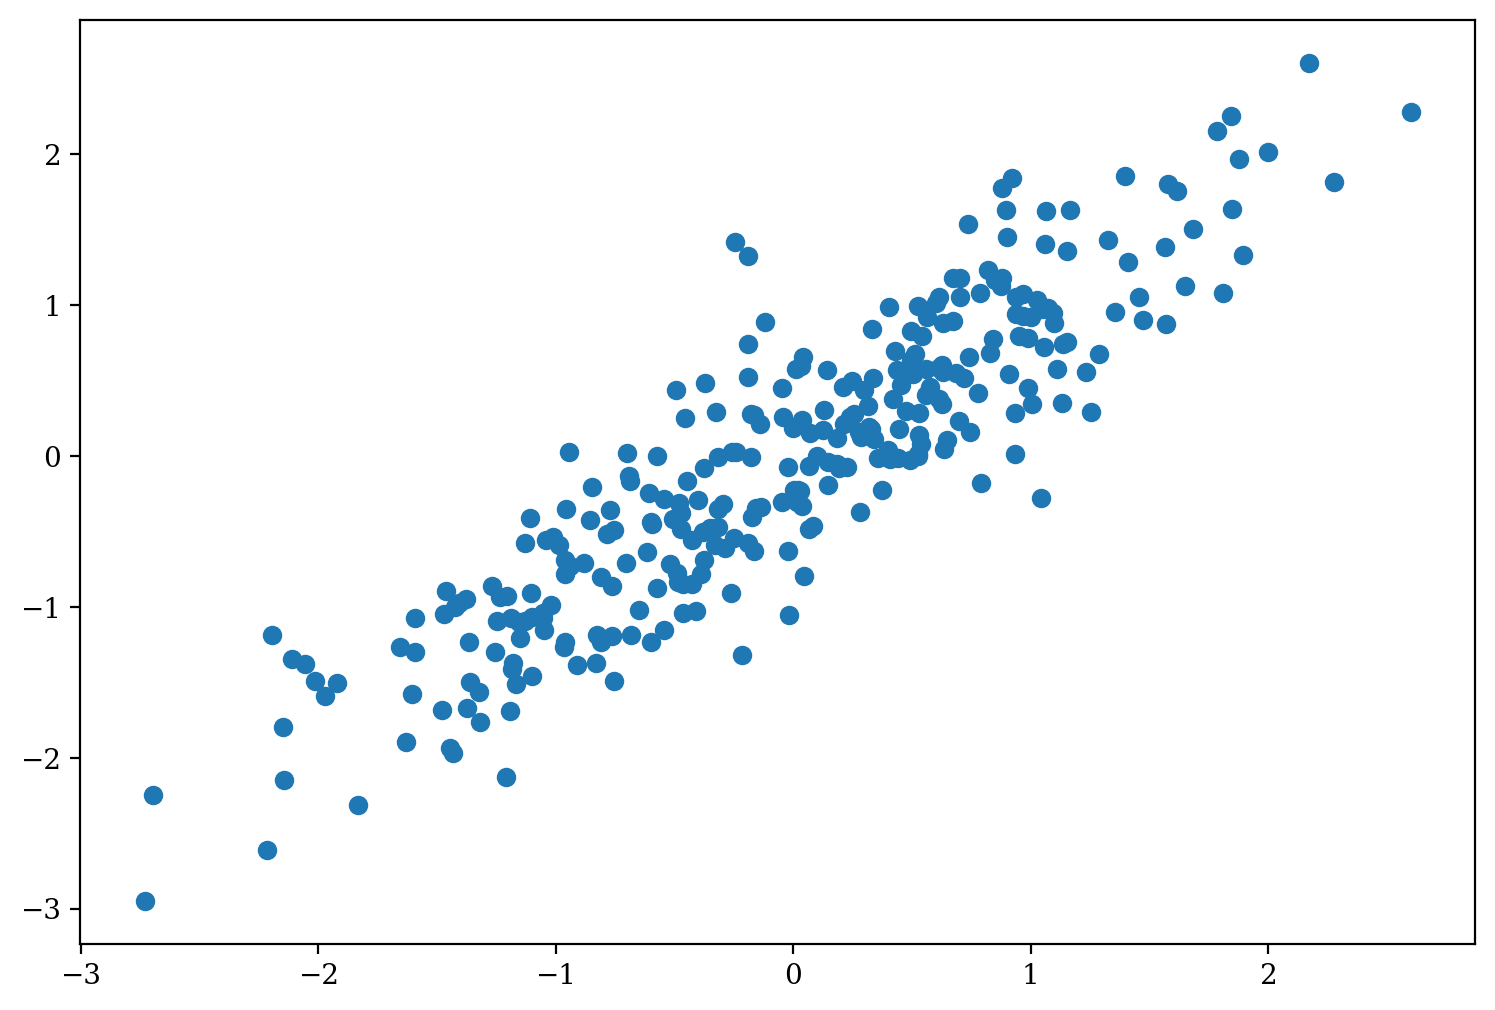

In [7]:
plt.scatter(pts[:,0],pts[:,1])
plt.show()

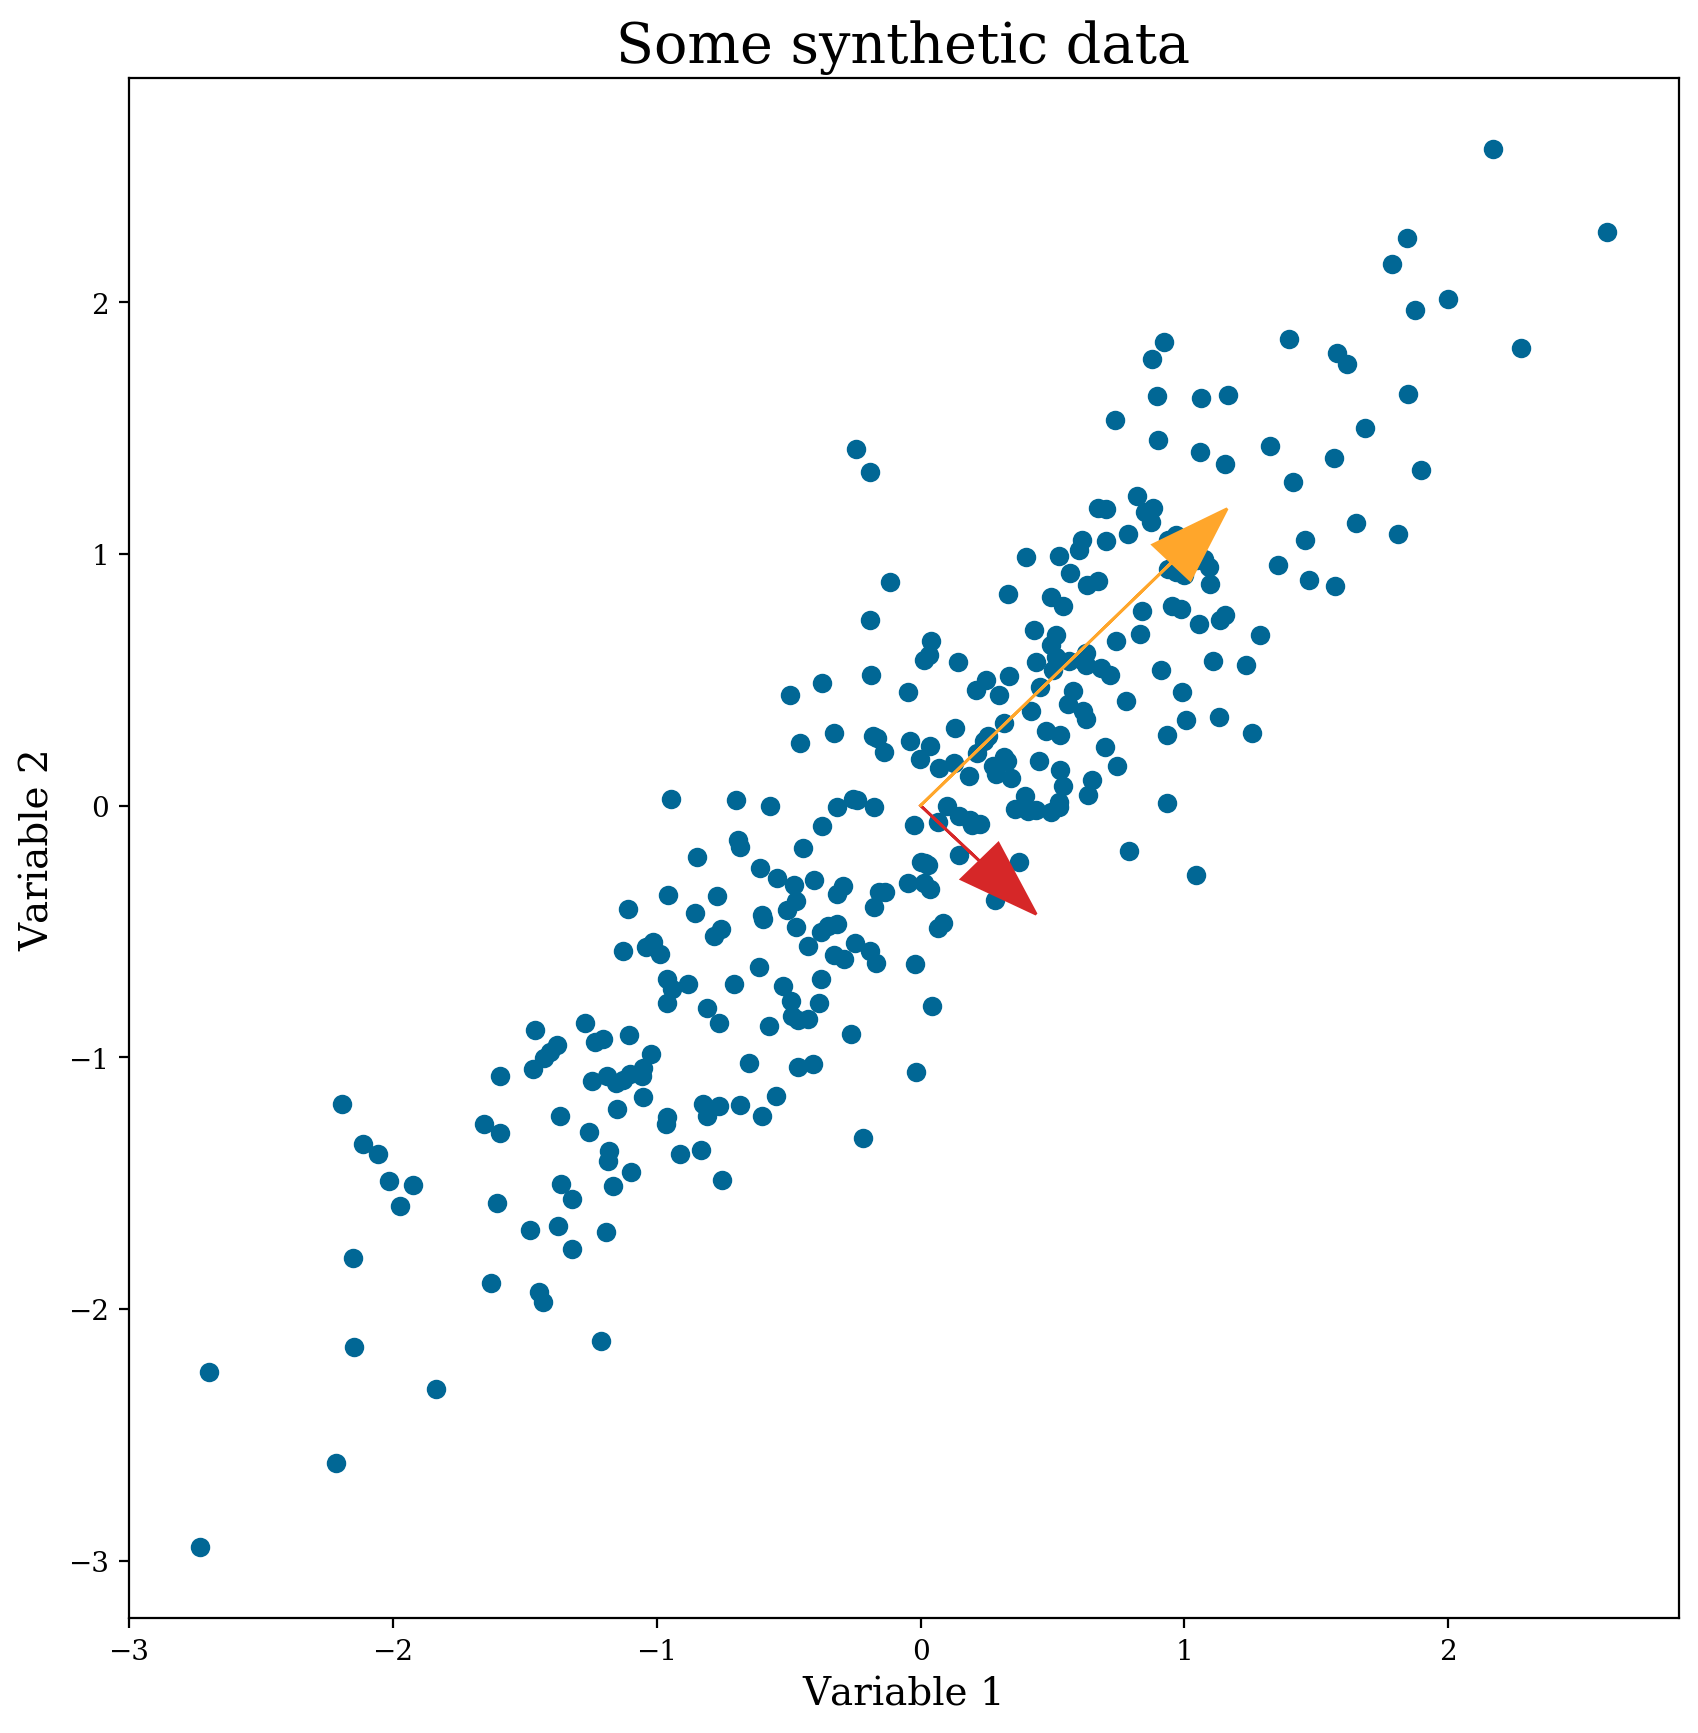

In [8]:
#don't worry about this line. It turns out this is what is happening under the hood during PCA
# I use this in order to be able to plot the arrows
vals,vecs = np.linalg.eigh(np.cov(pts.T))

plt.figure(figsize=(10,10))
plt.scatter(pts[:,0],pts[:,1], c='xkcd:peacock blue')
plt.title("Some synthetic data", fontsize=20)
plt.xlabel("Variable 1",fontsize=14)
plt.ylabel("Variable 2",fontsize=14)
head_width = .2
plt.arrow(mean[0],mean[1],-np.sqrt(vals[0])*vecs[0,0],-np.sqrt(vals[0])*vecs[1,0],
          head_width=head_width,fc='tab:red', ec='tab:red')
plt.arrow(mean[0],mean[1],np.sqrt(vals[1])*vecs[0,1], np.sqrt(vals[1])*vecs[1,1],
          head_width=head_width,fc='xkcd:mango', ec='xkcd:mango')
plt.show()

Following the examples from https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html we can find these principle components and use them to make a new coordinate system better suited to our data.

In [9]:
# Do PCA with sklearn
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [10]:
transformed_data = pca.fit_transform(pts)

transformed_data.shape

(300, 2)

(-3, 3)

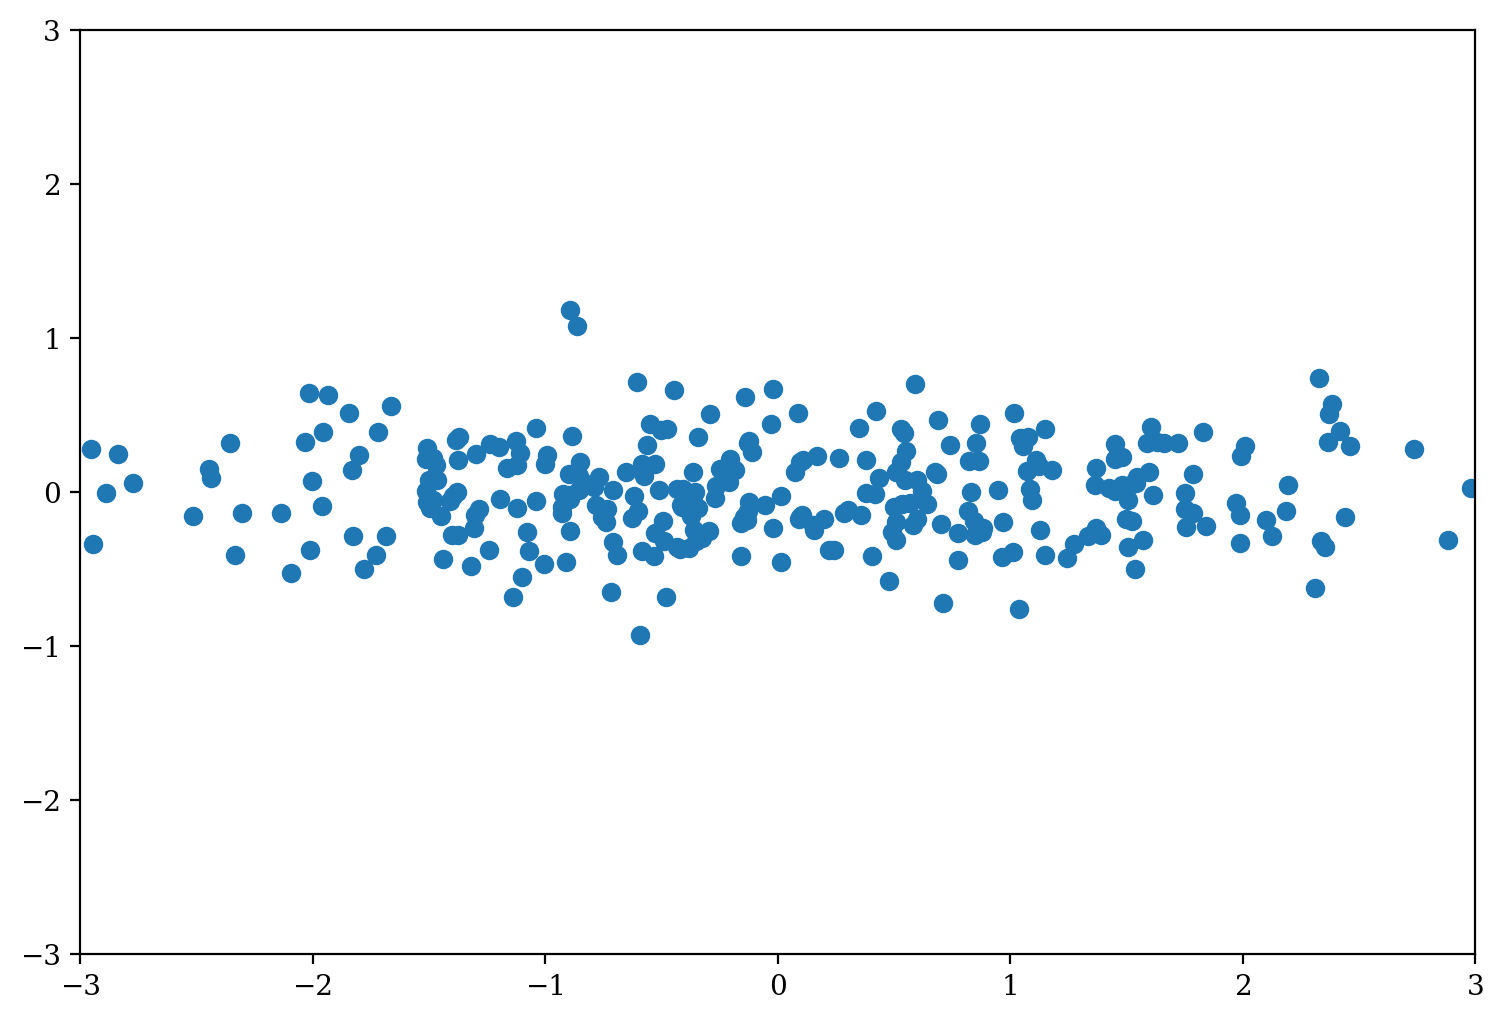

In [11]:
plt.scatter(transformed_data[:,0],transformed_data[:,1])
plt.xlim([-3,3])
plt.ylim([-3,3])

# Why do this? Visualizing high dimensional data

In [12]:
# cell to create toy high dimensional data

mean1 = [.7,0,0]
off_diag1 = 0
off_diag2 = 0
cov1 = [[.09,off_diag1,off_diag2],
       [off_diag1,.01,off_diag1],
       [off_diag2, off_diag1,.001]]
pts1 = np.random.multivariate_normal(mean1, cov1, size=300)

mean2 = [-.5,0,0]
off_diag1 = 0
off_diag2 = 0
cov2 = [[.01,off_diag1,off_diag2],
       [off_diag1,.4,off_diag1],
       [off_diag2, off_diag1,.005]]
pts2 = np.random.multivariate_normal(mean2, cov2, size=300)

points = np.concatenate([pts1,pts2],axis=0)

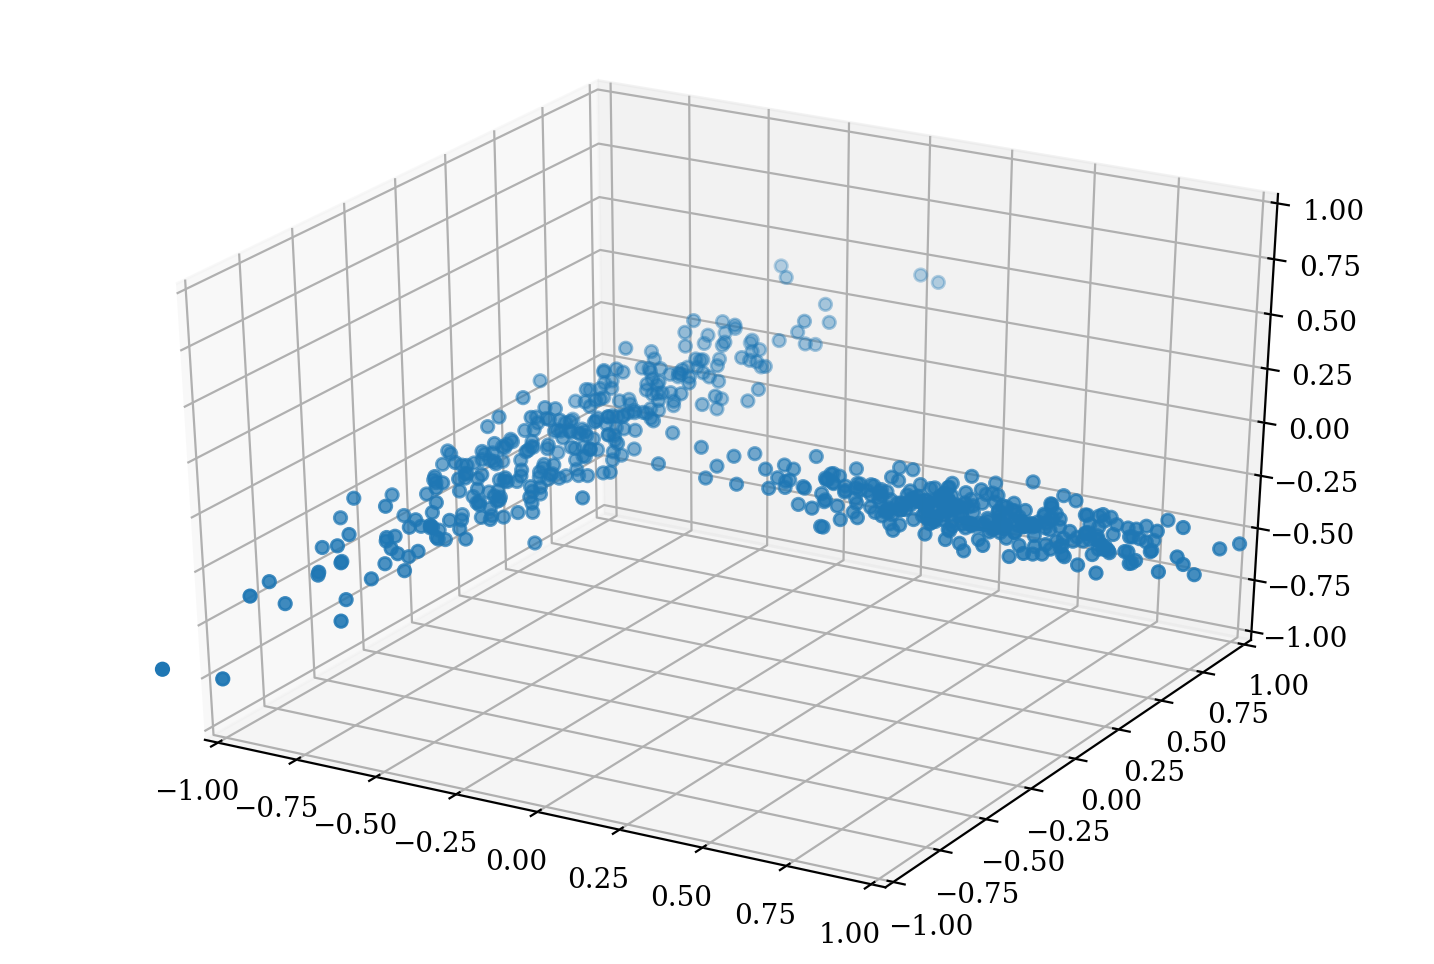

In [13]:
# cell to plot the data in 3D

from mpl_toolkits.mplot3d import Axes3D  # importing allows us to make 3d plots
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(points[:,0],points[:,1],points[:,2])

ax.set_xlim3d(-1,1)
ax.set_ylim3d(-1,1)
ax.set_zlim3d(-1,1)
plt.show()

In [14]:
pca = PCA(n_components=2)
transformed = pca.fit_transform(points)

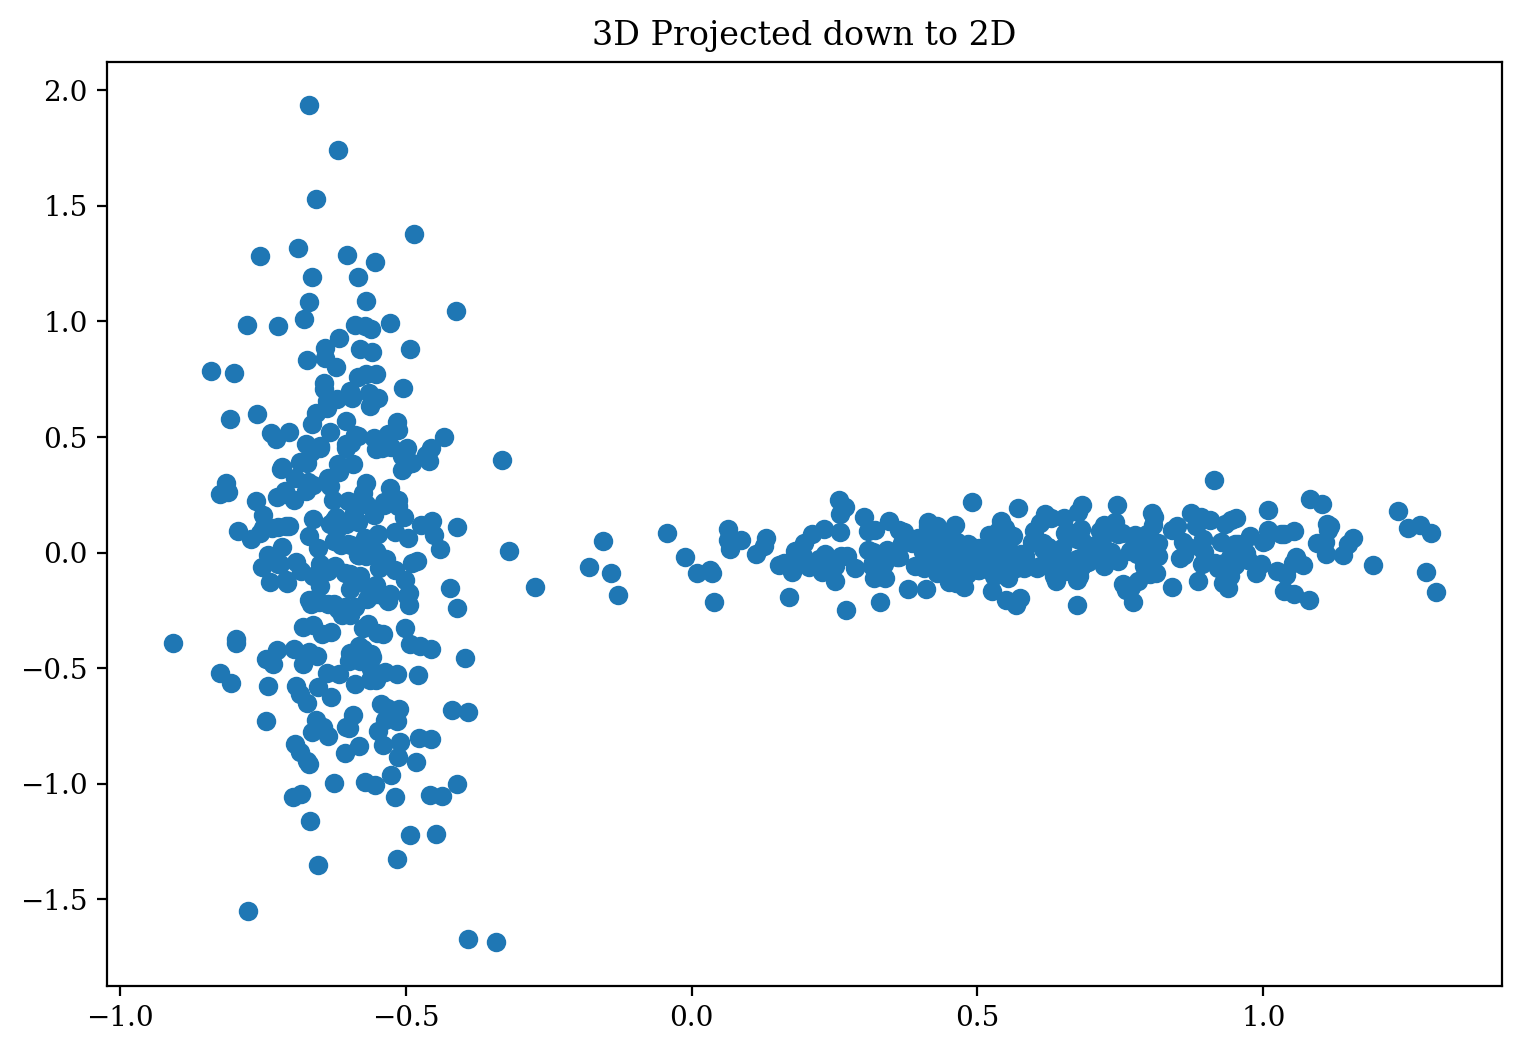

In [15]:
plt.title('3D Projected down to 2D')
plt.scatter(transformed[:,0],transformed[:,1])
plt.show()

# Application  - Stock S&P500

In [16]:
# Data downloaded from https://www.kaggle.com/camnugent/sandp500 
import glob
sp500_glob = glob.glob('data/*.csv',)

test = np.loadtxt('data/AAL_data.csv',
                  delimiter=',',skiprows=1,usecols=1)

names = []
prices = np.zeros((len(sp500_glob), test.shape[0]))
fails = []
for i,f in enumerate(sp500_glob):
    fname = f.split('/')[-1]
    names.append(fname.split('_')[0])
    try:
        prices[i] = np.loadtxt(f, delimiter=',',skiprows=1, usecols=1)
    except:
        fails.append(fname.split('_')[0])
        pass
    
#calculate and then normalize the price changes from day to day
price_changes = np.diff(prices)
real_price_changes = price_changes[price_changes.std(-1)>0]
stock_ticker = np.array(names)[price_changes.std(-1)>0]
# Below is a pretty standard way of normalizing numerical data
normalized_price_changes = (real_price_changes - real_price_changes.mean(axis=-1,keepdims=True))/(real_price_changes.std(axis=-1,keepdims=True))


arr = np.loadtxt('data/SP500_names.csv',delimiter='|',skiprows=1,dtype=str,encoding='utf-8')
company_info = {a[0].strip():a[[1,2,3]] for a in arr}
# idx_to_info = {i:name_dict[real_names[i]] for i in range(468)}

In [17]:
#check shape
# we have 468 companies and 1258 days for each of them
normalized_price_changes.shape

(468, 1258)

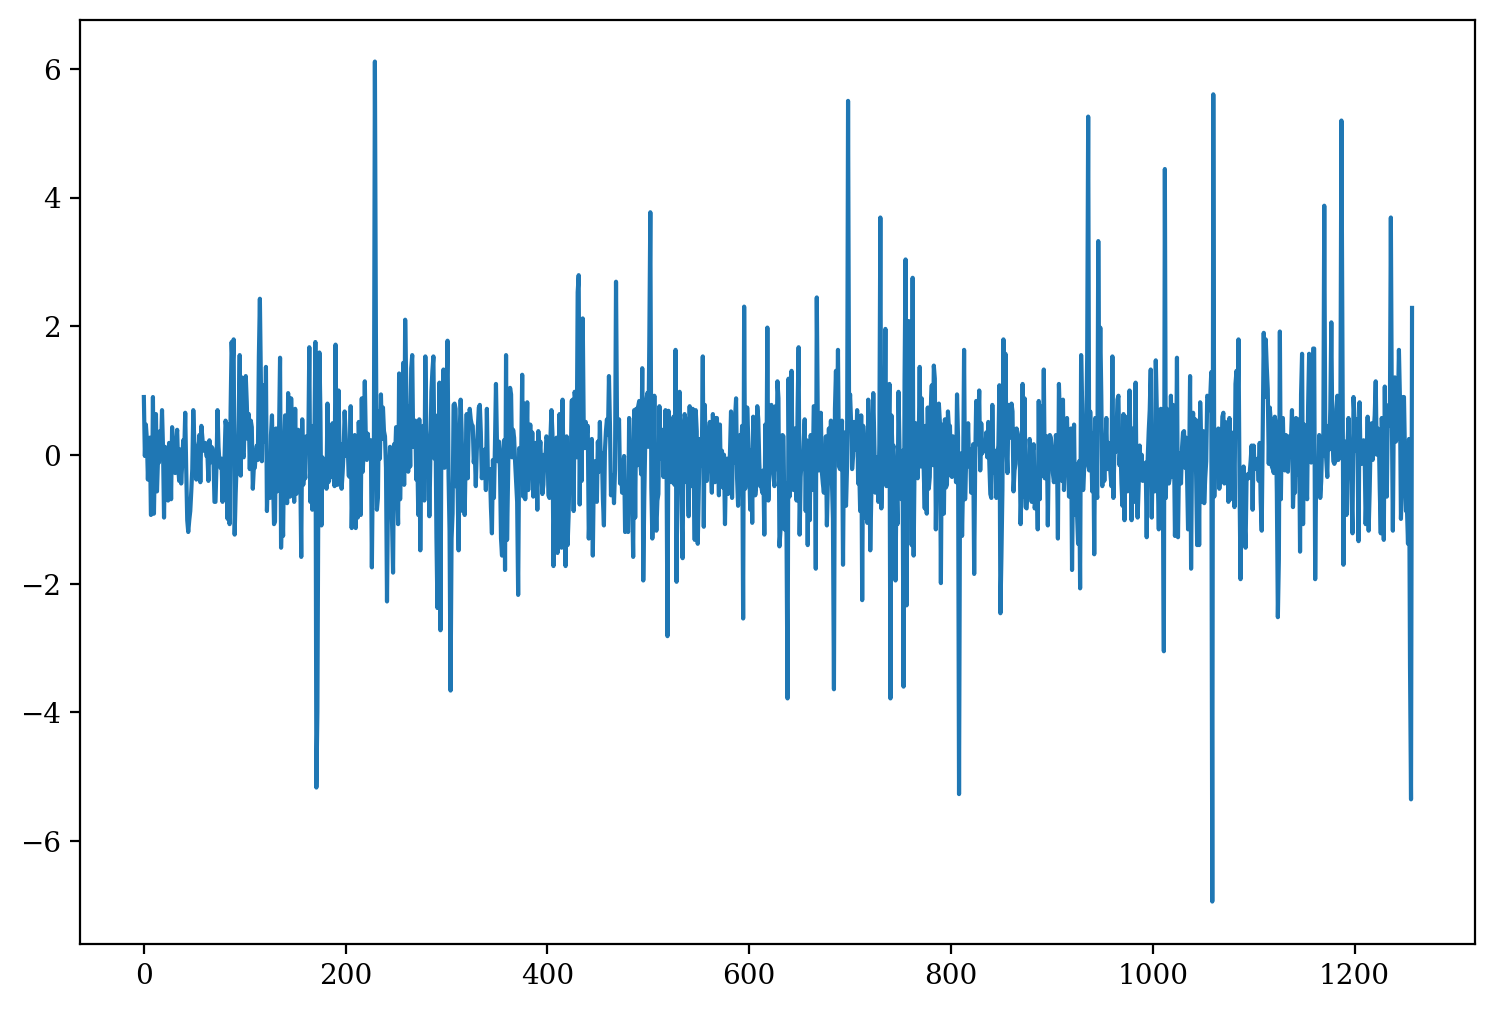

In [18]:
plt.plot(normalized_price_changes[0])

This looks wild because for each company we subtracted the mean of the price difference day to day and divided by the standard deviation. even though this can be confusing to look at, if we reduce the dimensionality using PCA we can be able to see groups of companies in similar industries

In [19]:
# look at normnormalized_price_changes shape
# + look at example

pca = PCA(n_components=3)
transformed = pca.fit_transform(normalized_price_changes)

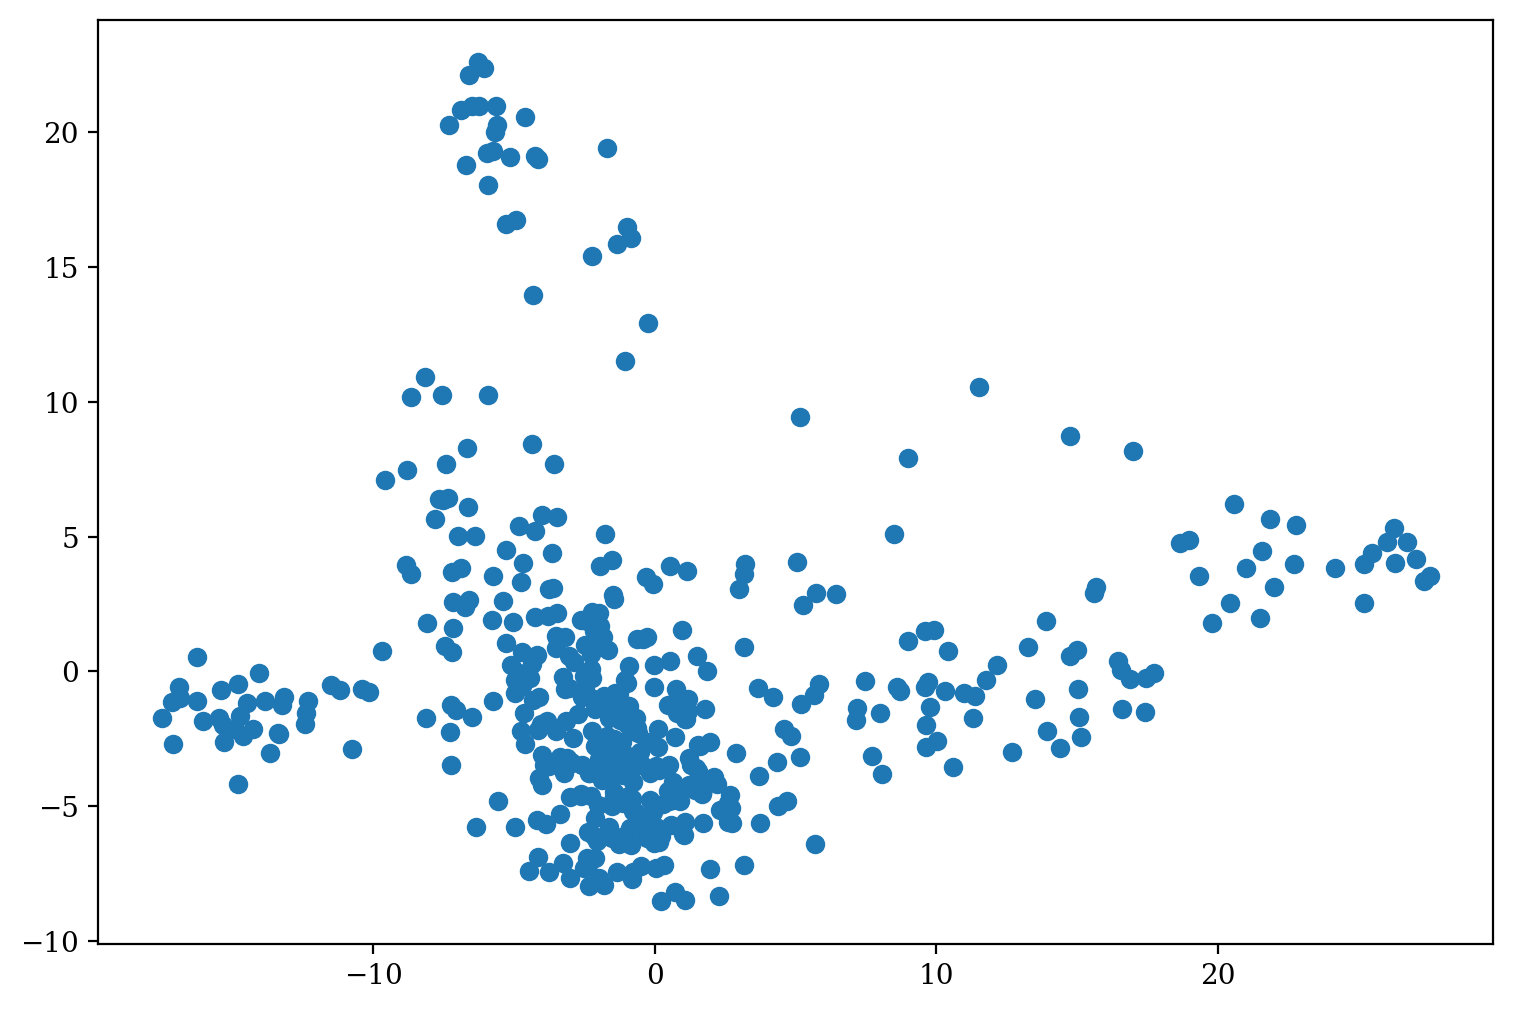

In [20]:
plt.scatter(transformed[:,0],transformed[:,1])
plt.show()

If we now use boolean indexing to groups of companies then we can check the names of the companies using the array `stock_ticker` and the dictionary `company_info`. `stock_ticker` is an array containing the stock ticker symbols in the as the companies in the dataset, and `company_info` is a dictionary with more info about the companies (taken from wikipedia) that uses the stock ticker symbols as keys. Because our dataset for company info and the dataset for prices came from different sources and the companies in the S&P500 change over time not every company in our dataset is in `company_info`, though most are.


Let's start by selecting all the point with PC1 < -10

In [21]:
idx = transformed[:,0] < -10
stock_ticker[idx]

array(['HBAN', 'DFS', 'MS', 'RJF', 'COF', 'C', 'STT', 'BBT', 'MET', 'WFC',
       'USB', 'CMA', 'PBCT', 'BAC', 'KEY', 'MTB', 'ZION', 'UNM', 'PRU',
       'IVZ', 'JPM', 'PFG', 'ETFC', 'AMP', 'PNC', 'FITB', 'TMK', 'NTRS',
       'LNC', 'BK', 'GS', 'STI', 'RF', 'SCHW'], dtype='<U5')

In [22]:
for c in stock_ticker[idx]:
    try:
        print(company_info[c])
    except:
        print(f'{c} not in company info')

['Huntington Bancshares' 'Financials' 'Regional Banks']
['Discover Financial Services' 'Financials' 'Consumer Finance']
['Morgan Stanley' 'Financials' 'Investment Banking & Brokerage']
['Raymond James Financial Inc.' 'Financials'
 'Investment Banking & Brokerage']
['Capital One Financial' 'Financials' 'Consumer Finance']
['Citigroup Inc.' 'Financials' 'Diversified Banks']
['State Street Corp.' 'Financials' 'Asset Management & Custody Banks']
BBT not in company info
['MetLife Inc.' 'Financials' 'Life & Health Insurance']
['Wells Fargo' 'Financials' 'Diversified Banks']
['U.S. Bancorp' 'Financials' 'Diversified Banks']
['Comerica Inc.' 'Financials' 'Diversified Banks']
["People's United Financial" 'Financials' 'Thrifts & Mortgage Finance']
['Bank of America Corp' 'Financials' 'Diversified Banks']
['KeyCorp' 'Financials' 'Regional Banks']
['M&T Bank Corp.' 'Financials' 'Regional Banks']
['Zions Bancorp' 'Financials' 'Regional Banks']
['Unum Group' 'Financials' 'Life & Health Insurance']
[

So it looks as though companies on the lower end of PC1 are all in banking. lets look at the other end

In [23]:
idx = transformed[:,0] > 22
stock_ticker[idx]

for c in stock_ticker[idx]:
    try:
        print(company_info[c])
    except:
        print(f'{c} not in company info')

['DTE Energy Co.' 'Utilities' 'Multi-Utilities']
['Consolidated Edison' 'Utilities' 'Electric Utilities']
['Duke Energy' 'Utilities' 'Electric Utilities']
['Alliant Energy Corp' 'Utilities' 'Electric Utilities']
['Wec Energy Group Inc' 'Utilities' 'Electric Utilities']
['Southern Co.' 'Utilities' 'Electric Utilities']
['American Electric Power' 'Utilities' 'Electric Utilities']
['Pinnacle West Capital' 'Utilities' 'Multi-Utilities']
['NextEra Energy' 'Utilities' 'Multi-Utilities']
['CMS Energy' 'Utilities' 'Multi-Utilities']
['Ameren Corp' 'Utilities' 'Multi-Utilities']
['Xcel Energy Inc' 'Utilities' 'Multi-Utilities']
['Entergy Corp.' 'Utilities' 'Electric Utilities']


These are energy companies!

#### Quantiative clustering.

If we wanted to be more rigorous with our clustering we could use the clustering methods in sklearn (https://scikit-learn.org/stable/modules/clustering.html#clustering) to group the datapoints based on their stock returns.

### What have we lost?
Of course we have lost information by reducing the the dimensionality. We can qauntify this by looking at how much of the variance of the dataset each additional principle component explains. Happily sklearn provides this through their PCA object.

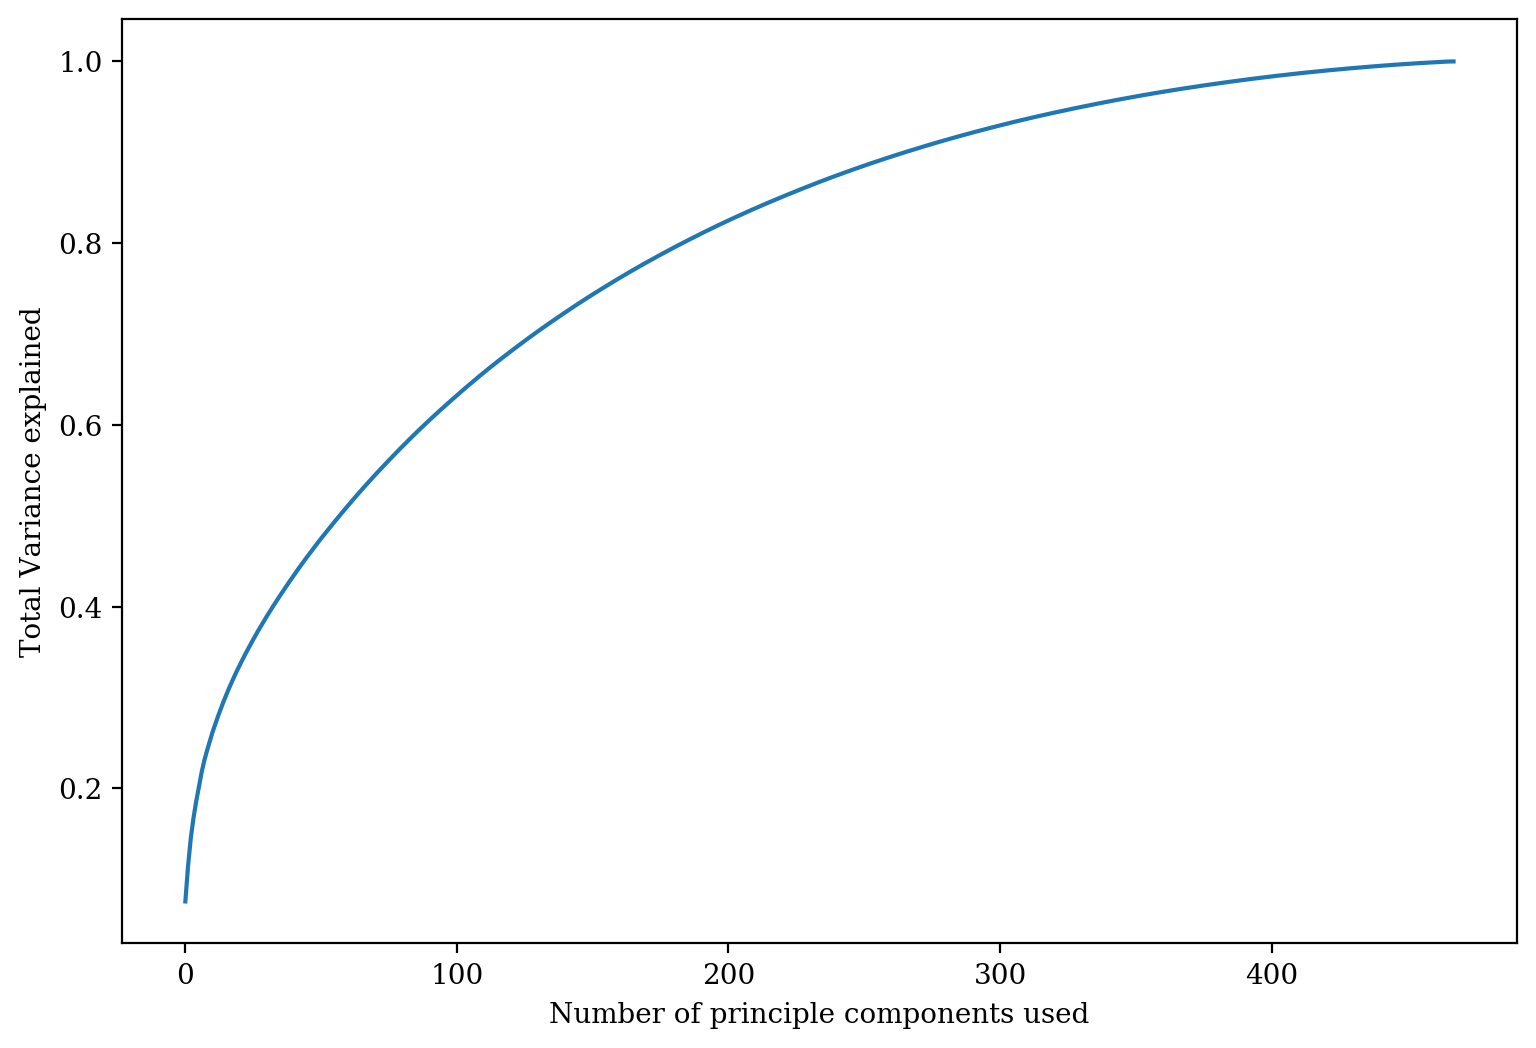

In [24]:
pca = PCA(n_components=468) # do with teh maximum number of components
pca.fit(normalized_price_changes)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of principle components used')
plt.ylabel('Total Variance explained')
plt.show()

### Doing some indexing to color each point based on the industry that the company is in


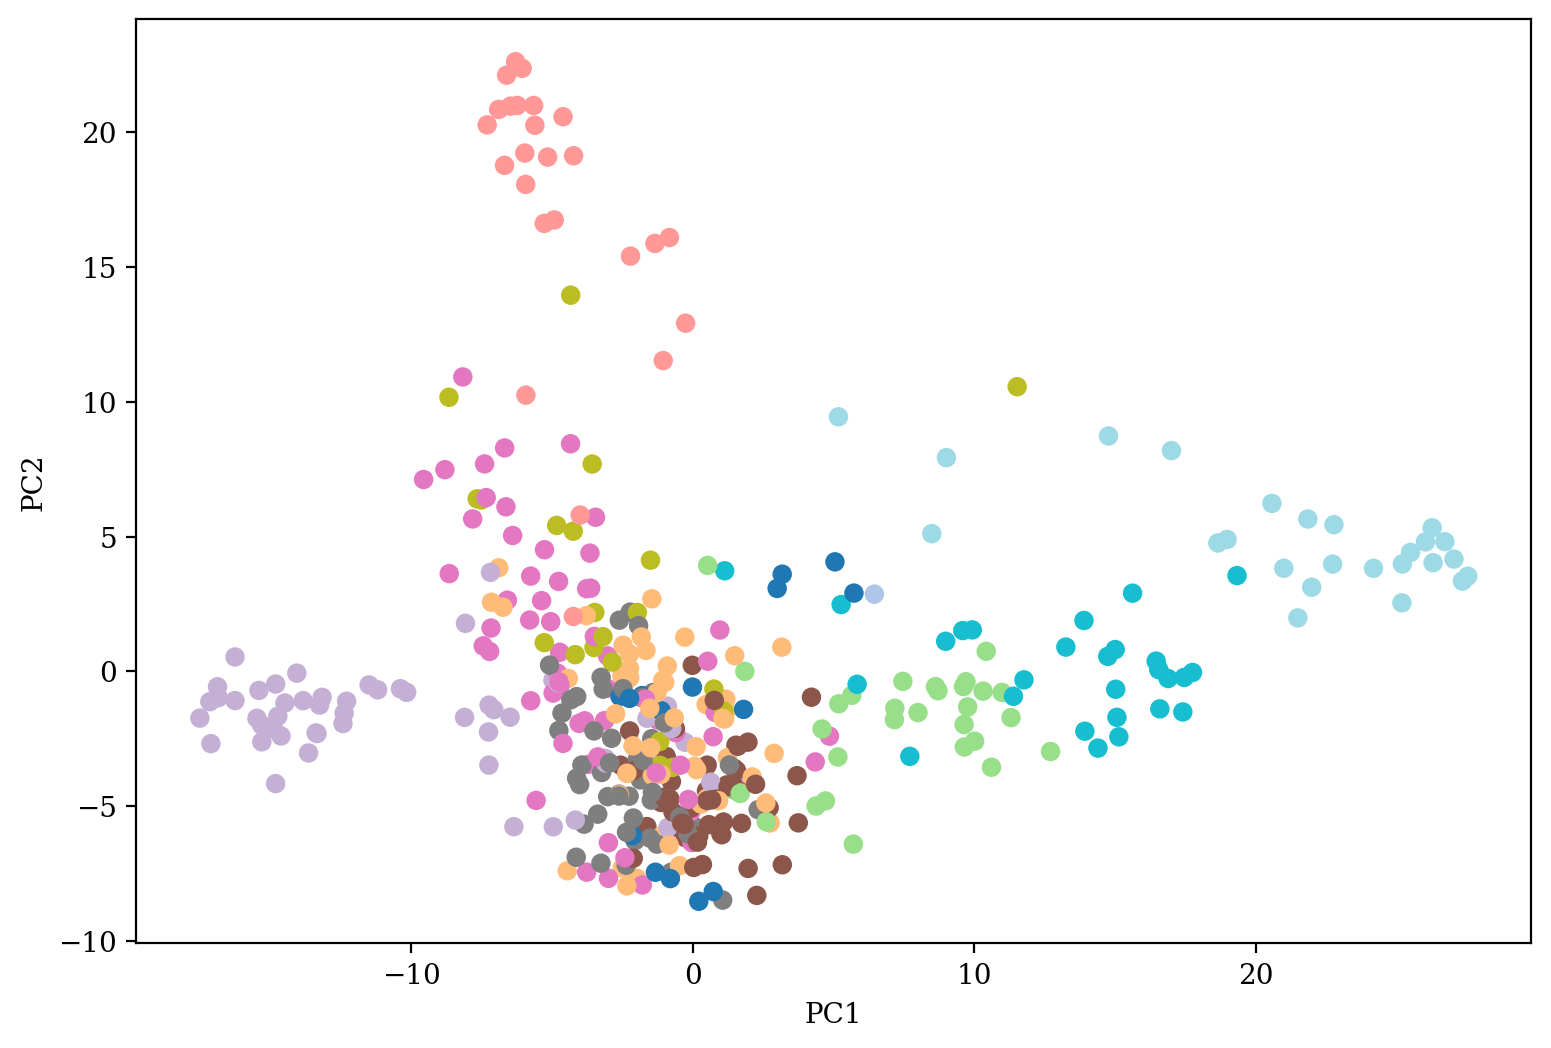

In [25]:
primary = []
secondary = []
good_idx = np.zeros(stock_ticker.shape[0], dtype=bool)

for i,name in enumerate(stock_ticker):
    try:
        info = company_info[name]
        good_idx[i] = True
        primary.append(info[1])
        secondary.append(info[2])
    except:
        pass
psector_dict = {val:i for i,val in enumerate(np.unique(primary))}
data_colors = np.array([psector_dict[val] for val in primary],dtype=int)
clean_names = stock_ticker[good_idx]
N_primary = np.unique(primary).shape[0]
plt.scatter(transformed[good_idx][:,0],transformed[good_idx][:,1], c=data_colors, cmap='tab20')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

### Same thing but in 3D

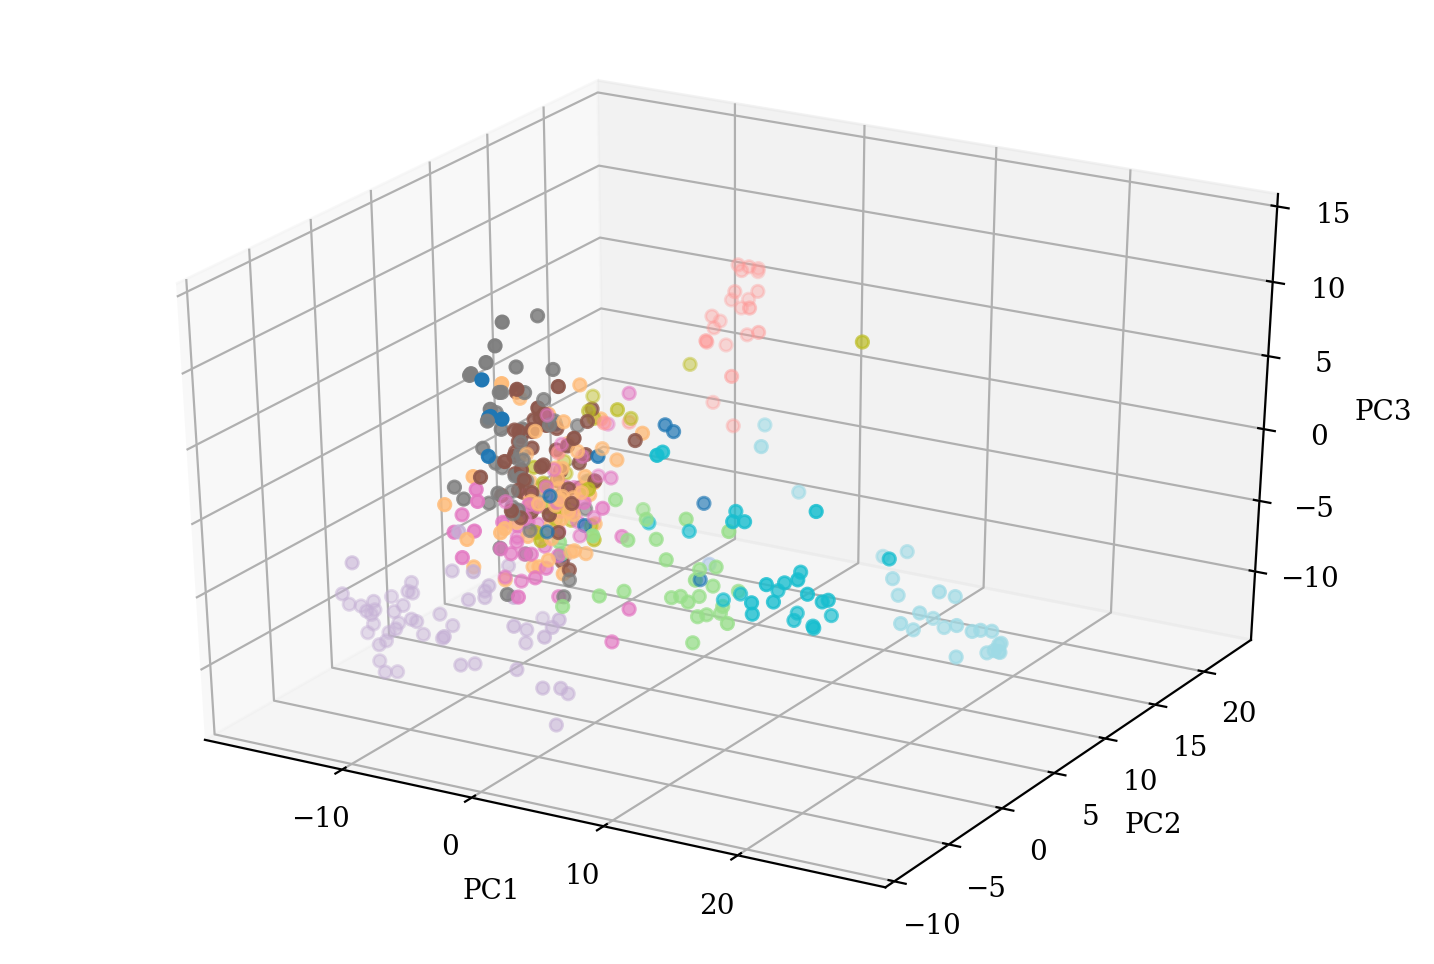

In [26]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(transformed[good_idx][:,0],transformed[good_idx][:,1], transformed[good_idx][:,2], c=data_colors, cmap='tab20')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()

## The Math behind Principal Component Analysis - Variance and Covariance

*This is beyond the scope of this bootcamp but provides some math equations to explain Covariance and PCA*

Many of you have probably taken a statistics class and had to compute the variance or standard deviation of some data. As a refresher, if we have $N$ observations of a random variable $x$ then the variance is

$$\sigma^2 = \frac{1}{N}\sum_{n=1}^{N} (x_n-\mu)^2$$

Where $\mu$ is the mean or average of the $x$ values in the dataset.

The covariance generalizes this concept to the case where one is interested in multiple random variables that may be correlated. If $x$ and $y$ are random variables which we have observed $N$ times then we can say

$$\text{Cov}(x,y) = \frac{1}{N} \sum_{n=1}^{N} (x_n-\mu_x)(y_n -\mu_y).$$

Note the follwing important relations:

$$\text{Cov}(x,x) = \sigma^2_x$$
$$ \text{Cov}(x,y) = \text{Cov}(y,x).$$

In general if there are $M$ random variables lets call them $x^{(i)}$ that may be correlated it is quite convenient to consider a *Covariance matrix* this a matrix $C$ such that 

$$C_{i,j} = \text{Cov}(x^{(i)},x^{(j)}).$$

Note that the two identies discussed above imply that 
1. The diagonal elements of the covariance matrix are the variances of each variable and
1. The covariance matrix is symmetric and
1. For the mathematicians it is also positive definite since variances are always positive. 


The covariance of different variables in a dataset is one of the most important things one can learn about their data and there are lots of ways of using the information in the covariance matrix to analyze and understand the data. 


The principle components are the eigenvectors of the covariance matrix, and we get the lower dimensional projections of the data by projecting onto a subset of the eigenvectors. The eigenvectors are ordered in importance by the size of their associated eigenvalue.